In [94]:
#Linear Regression packages
from sklearn.linear_model import LinearRegression

#Neural Network packages
from sklearn.neural_network import MLPRegressor

#Decision Tree packages
from sklearn.tree import DecisionTreeRegressor

#Random Forest Regressor packages
from sklearn.ensemble import RandomForestRegressor

#Gradient Boosting packages
from sklearn.ensemble import GradientBoostingRegressor

#ML packages
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

#metrics
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from scipy import stats

#Graphics packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

#Scientific computing and tables
import numpy as np
import pandas as pd

#Visualizations
import plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

#Versions
from platform import python_version
print(f"Python version: {python_version()}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Plotly version: {plotly.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"SciPy version: {sp.__version__}")

#Graph style
plt.style.use('default')

Python version: 3.12.4
scikit-learn version: 1.4.2
NumPy version: 1.26.4
pandas version: 2.2.2
Matplotlib version: 3.8.4
Plotly version: 5.22.0
seaborn version: 0.13.2
SciPy version: 1.13.1


In [95]:
# Loading the DataFrame file

df_original = pd.read_excel('principal_dataset.xlsx')

In [96]:
# Checking the first rows of the DataFrame

df_original.head()

autor sample_number figure  medium_size_microparticle_(μm)  \
0  zhang2021             1     7a                            4.00   
1  zhang2021             1     7a                            4.00   
2  zhang2021             1     7a                            4.00   
3  zhang2021             1     7a                            4.00   
4  zhang2021             1     7a                            4.00   

   microparticle_fraction_(wt%) coating_type carrier_liquid_type  \
0                         40.00         none        silicone oil   
1                         40.00         none        silicone oil   
2                         40.00         none        silicone oil   
3                         40.00         none        silicone oil   
4                         40.00         none        silicone oil   

   carrier_liquid_fraction_(wt%)  carrier_liquid_viscosity_(cst)  \
0                             54                             100   
1                             54                             100   
2                             54                             100   
3                             54                             100   
4                             54                             100   

  nanoparticle_type  medium_size_nanoparticle_(nm)  \
0              none                              0   
1              none                              0   
2              none                              0   
3              none                              0   
4              none                              0   

   nanoparticle_fraction_(wt%)  SDS_fraction_(wt%)  \
0                            0                   2   
1                            0                   2   
2                            0                   2   
3                            0                   2   
4                            0                   2   

   Stearic_acid_fraction_(wt%)  fumed_silica_for_MRFs_fraction_(wt%)  \
0                            0                                  0.00   
1                            0                                  0.00   
2                            0                                  0.00   
3                            0                                  0.00   
4                            0                                  0.00   

   bentonite_fraction_(wt%)  liquid_paraffin_fraction_(wt%)  \
0                         1                               2   
1                         1                               2   
2                         1                               2   
3                         1                               2   
4                         1                               2   

   black_lead_fraction_(wt%)  time_(h)  sedimentation_rate_(%)  
0                          1      1.49                    7.58  
1                          1      2.52                    8.27  
2                          1      3.45                    3.15  
3                          1      3.66                    3.67  
4                          1      3.89                    4.24

In [97]:
# Deleting metadata

columns_delete = ['autor', 'sample_number', 'figure']
df_clean = df_original.drop(columns_delete, axis=1)

In [98]:
# Checking first rows of clean DataFrame

df_clean.head()

medium_size_microparticle_(μm)  microparticle_fraction_(wt%) coating_type  \
0                            4.00                         40.00         none   
1                            4.00                         40.00         none   
2                            4.00                         40.00         none   
3                            4.00                         40.00         none   
4                            4.00                         40.00         none   

  carrier_liquid_type  carrier_liquid_fraction_(wt%)  \
0        silicone oil                             54   
1        silicone oil                             54   
2        silicone oil                             54   
3        silicone oil                             54   
4        silicone oil                             54   

   carrier_liquid_viscosity_(cst) nanoparticle_type  \
0                             100              none   
1                             100              none   
2                             100              none   
3                             100              none   
4                             100              none   

   medium_size_nanoparticle_(nm)  nanoparticle_fraction_(wt%)  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   SDS_fraction_(wt%)  Stearic_acid_fraction_(wt%)  \
0                   2                            0   
1                   2                            0   
2                   2                            0   
3                   2                            0   
4                   2                            0   

   fumed_silica_for_MRFs_fraction_(wt%)  bentonite_fraction_(wt%)  \
0                                  0.00                         1   
1                                  0.00                         1   
2                                  0.00                         1   
3                                  0.00                         1   
4                                  0.00                         1   

   liquid_paraffin_fraction_(wt%)  black_lead_fraction_(wt%)  time_(h)  \
0                               2                          1      1.49   
1                               2                          1      2.52   
2                               2                          1      3.45   
3                               2                          1      3.66   
4                               2                          1      3.89   

   sedimentation_rate_(%)  
0                    7.58  
1                    8.27  
2                    3.15  
3                    3.67  
4                    4.24

In [99]:
# Checking file information

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   medium_size_microparticle_(μm)        4898 non-null   float64
 1   microparticle_fraction_(wt%)          4898 non-null   float64
 2   coating_type                          4898 non-null   object 
 3   carrier_liquid_type                   4898 non-null   object 
 4   carrier_liquid_fraction_(wt%)         4898 non-null   int64  
 5   carrier_liquid_viscosity_(cst)        4898 non-null   int64  
 6   nanoparticle_type                     4898 non-null   object 
 7   medium_size_nanoparticle_(nm)         4898 non-null   int64  
 8   nanoparticle_fraction_(wt%)           4898 non-null   int64  
 9   SDS_fraction_(wt%)                    4898 non-null   int64  
 10  Stearic_acid_fraction_(wt%)           4898 non-null   int64  
 11  fumed_silica_for_

In [100]:
# Total unique values ​​for each variable

unique_values = []
for i in df_clean.columns[0:17].tolist():
    print(i, ':', len(df_clean[i].astype(str).value_counts()))
    unique_values.append(len(df_clean[i].astype(str).value_counts()))

medium_size_microparticle_(μm) : 6
microparticle_fraction_(wt%) : 36
coating_type : 4
carrier_liquid_type : 2
carrier_liquid_fraction_(wt%) : 25
carrier_liquid_viscosity_(cst) : 4
nanoparticle_type : 3
medium_size_nanoparticle_(nm) : 2
nanoparticle_fraction_(wt%) : 3
SDS_fraction_(wt%) : 5
Stearic_acid_fraction_(wt%) : 5
fumed_silica_for_MRFs_fraction_(wt%) : 23
bentonite_fraction_(wt%) : 2
liquid_paraffin_fraction_(wt%) : 2
black_lead_fraction_(wt%) : 2
time_(h) : 3806
sedimentation_rate_(%) : 2954


In [101]:
# Checking file dimensions

df_clean.shape

(4898, 17)

In [102]:
# Selecting numeric columns only
df_numeric = df_clean.select_dtypes(include=['number'])

# Counting how many rows have at least one negative value
count_negative_lines = df_numeric.lt(0).any(axis=1).sum()

print(f"Total rows with negative values: {count_negative_lines}")

Total rows with negative values: 0


In [103]:
# Viewing some statistical measures

df_clean.describe()

medium_size_microparticle_(μm)  microparticle_fraction_(wt%)  \
count                         4898.00                       4898.00   
mean                             4.41                         51.67   
std                              0.74                         10.36   
min                              2.00                         27.90   
25%                              4.00                         40.00   
50%                              4.00                         50.00   
75%                              5.50                         60.00   
max                              5.50                         70.00   

       carrier_liquid_fraction_(wt%)  carrier_liquid_viscosity_(cst)  \
count                        4898.00                         4898.00   
mean                           43.68                          205.18   
std                            10.30                          280.99   
min                            25.00                           50.00   
25%                            35.00                          100.00   
50%                            41.00                          100.00   
75%                            51.00                          100.00   
max                            70.00                         1023.00   

       medium_size_nanoparticle_(nm)  nanoparticle_fraction_(wt%)  \
count                        4898.00                      4898.00   
mean                            0.22                         0.16   
std                             1.62                         1.36   
min                             0.00                         0.00   
25%                             0.00                         0.00   
50%                             0.00                         0.00   
75%                             0.00                         0.00   
max                            12.00                        13.00   

       SDS_fraction_(wt%)  Stearic_acid_fraction_(wt%)  \
count             4898.00                      4898.00   
mean                 1.01                         0.94   
std                  1.69                         1.65   
min                  0.00                         0.00   
25%                  0.00                         0.00   
50%                  0.00                         0.00   
75%                  2.00                         2.00   
max                  5.00                         5.00   

       fumed_silica_for_MRFs_fraction_(wt%)  bentonite_fraction_(wt%)  \
count                               4898.00                   4898.00   
mean                                   0.28                      0.57   
std                                    0.50                      0.50   
min                                    0.00                      0.00   
25%                                    0.00                      0.00   
50%                                    0.00                      1.00   
75%                                    0.40                      1.00   
max                                    2.10                      1.00   

       liquid_paraffin_fraction_(wt%)  black_lead_fraction_(wt%)  time_(h)  \
count                         4898.00                    4898.00   4898.00   
mean                             1.13                       0.57    725.59   
std                              0.99                       0.50    664.35   
min                              0.00                       0.00      0.08   
25%                              0.00                       0.00    120.34   
50%                              2.00                       1.00    527.17   
75%                              2.00                       1.00   1205.98   
max                              2.00                       1.00   2410.97   

       sedimentation_rate_(%)  
count                 4898.00  
mean                    27.87  
std                     18.68  
min                      0.00  
25%                     13.10  
50%                 

In [104]:
# Analyze possible outliers
numeric_variables = []
for i in df_clean.columns[0:17].tolist():
        if df_clean.dtypes[i] == 'int64' or df_clean.dtypes[i] == 'float64':                        
            numeric_variables.append(i)   

In [105]:
numeric_variables

['medium_size_microparticle_(μm)',
 'microparticle_fraction_(wt%)',
 'carrier_liquid_fraction_(wt%)',
 'carrier_liquid_viscosity_(cst)',
 'medium_size_nanoparticle_(nm)',
 'nanoparticle_fraction_(wt%)',
 'SDS_fraction_(wt%)',
 'Stearic_acid_fraction_(wt%)',
 'fumed_silica_for_MRFs_fraction_(wt%)',
 'bentonite_fraction_(wt%)',
 'liquid_paraffin_fraction_(wt%)',
 'black_lead_fraction_(wt%)',
 'time_(h)',
 'sedimentation_rate_(%)']

In [106]:
len(numeric_variables)

14

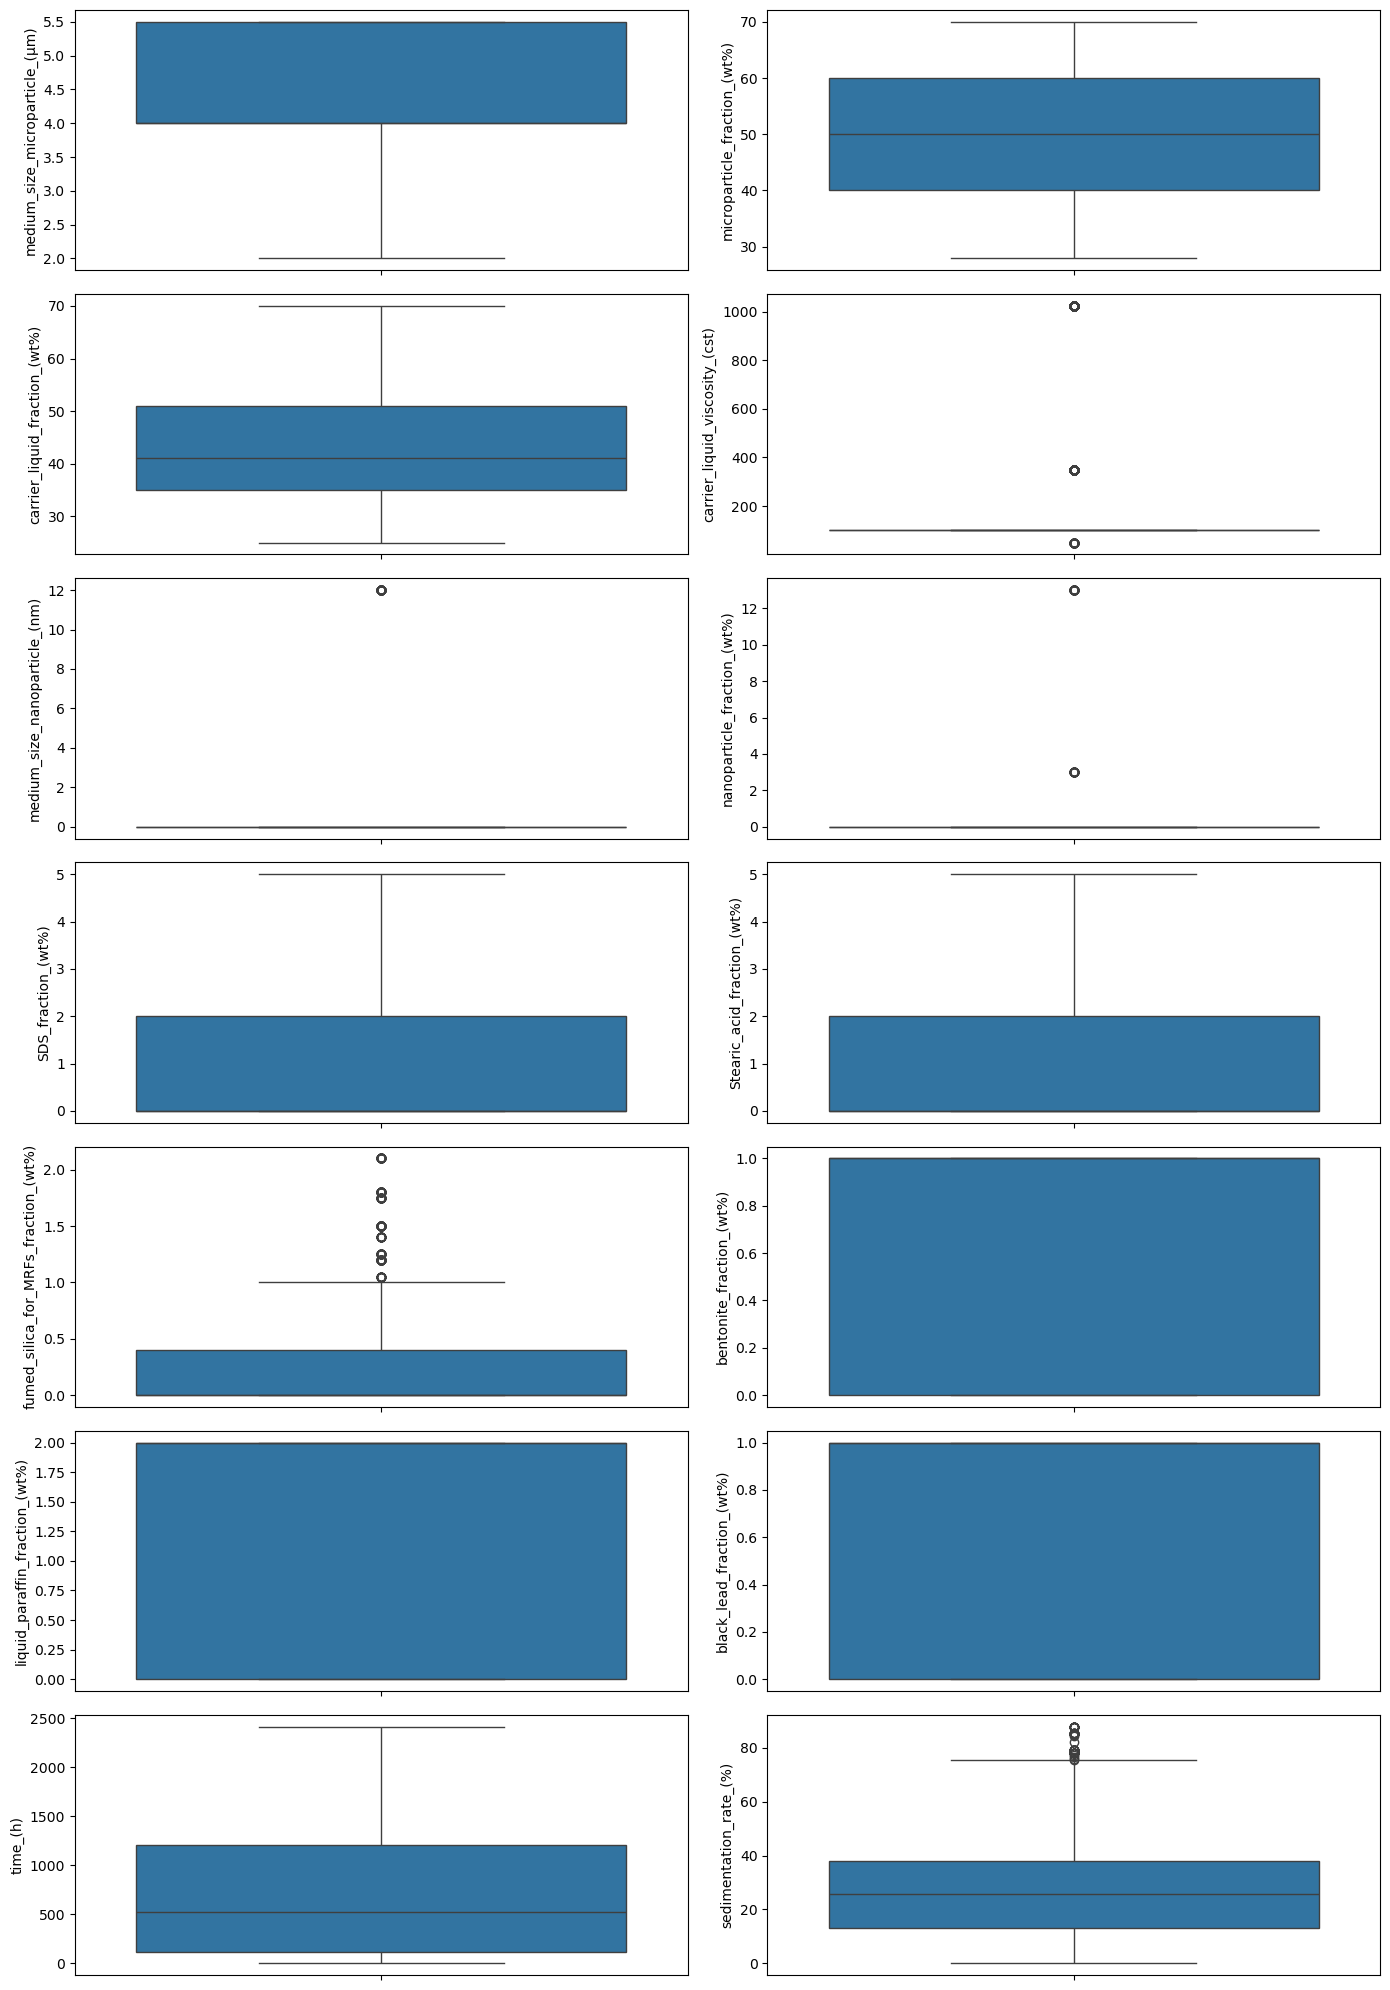

In [107]:
# Visualizing possible outliers through graphs

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2)

row = 0
column = 0
for i in numeric_variables:
    sns.boxplot(data = df_clean, y=i, ax=axes[row][column])
    column += 1
    if column == 2:
        row += 1
        column = 0
        
plt.show()

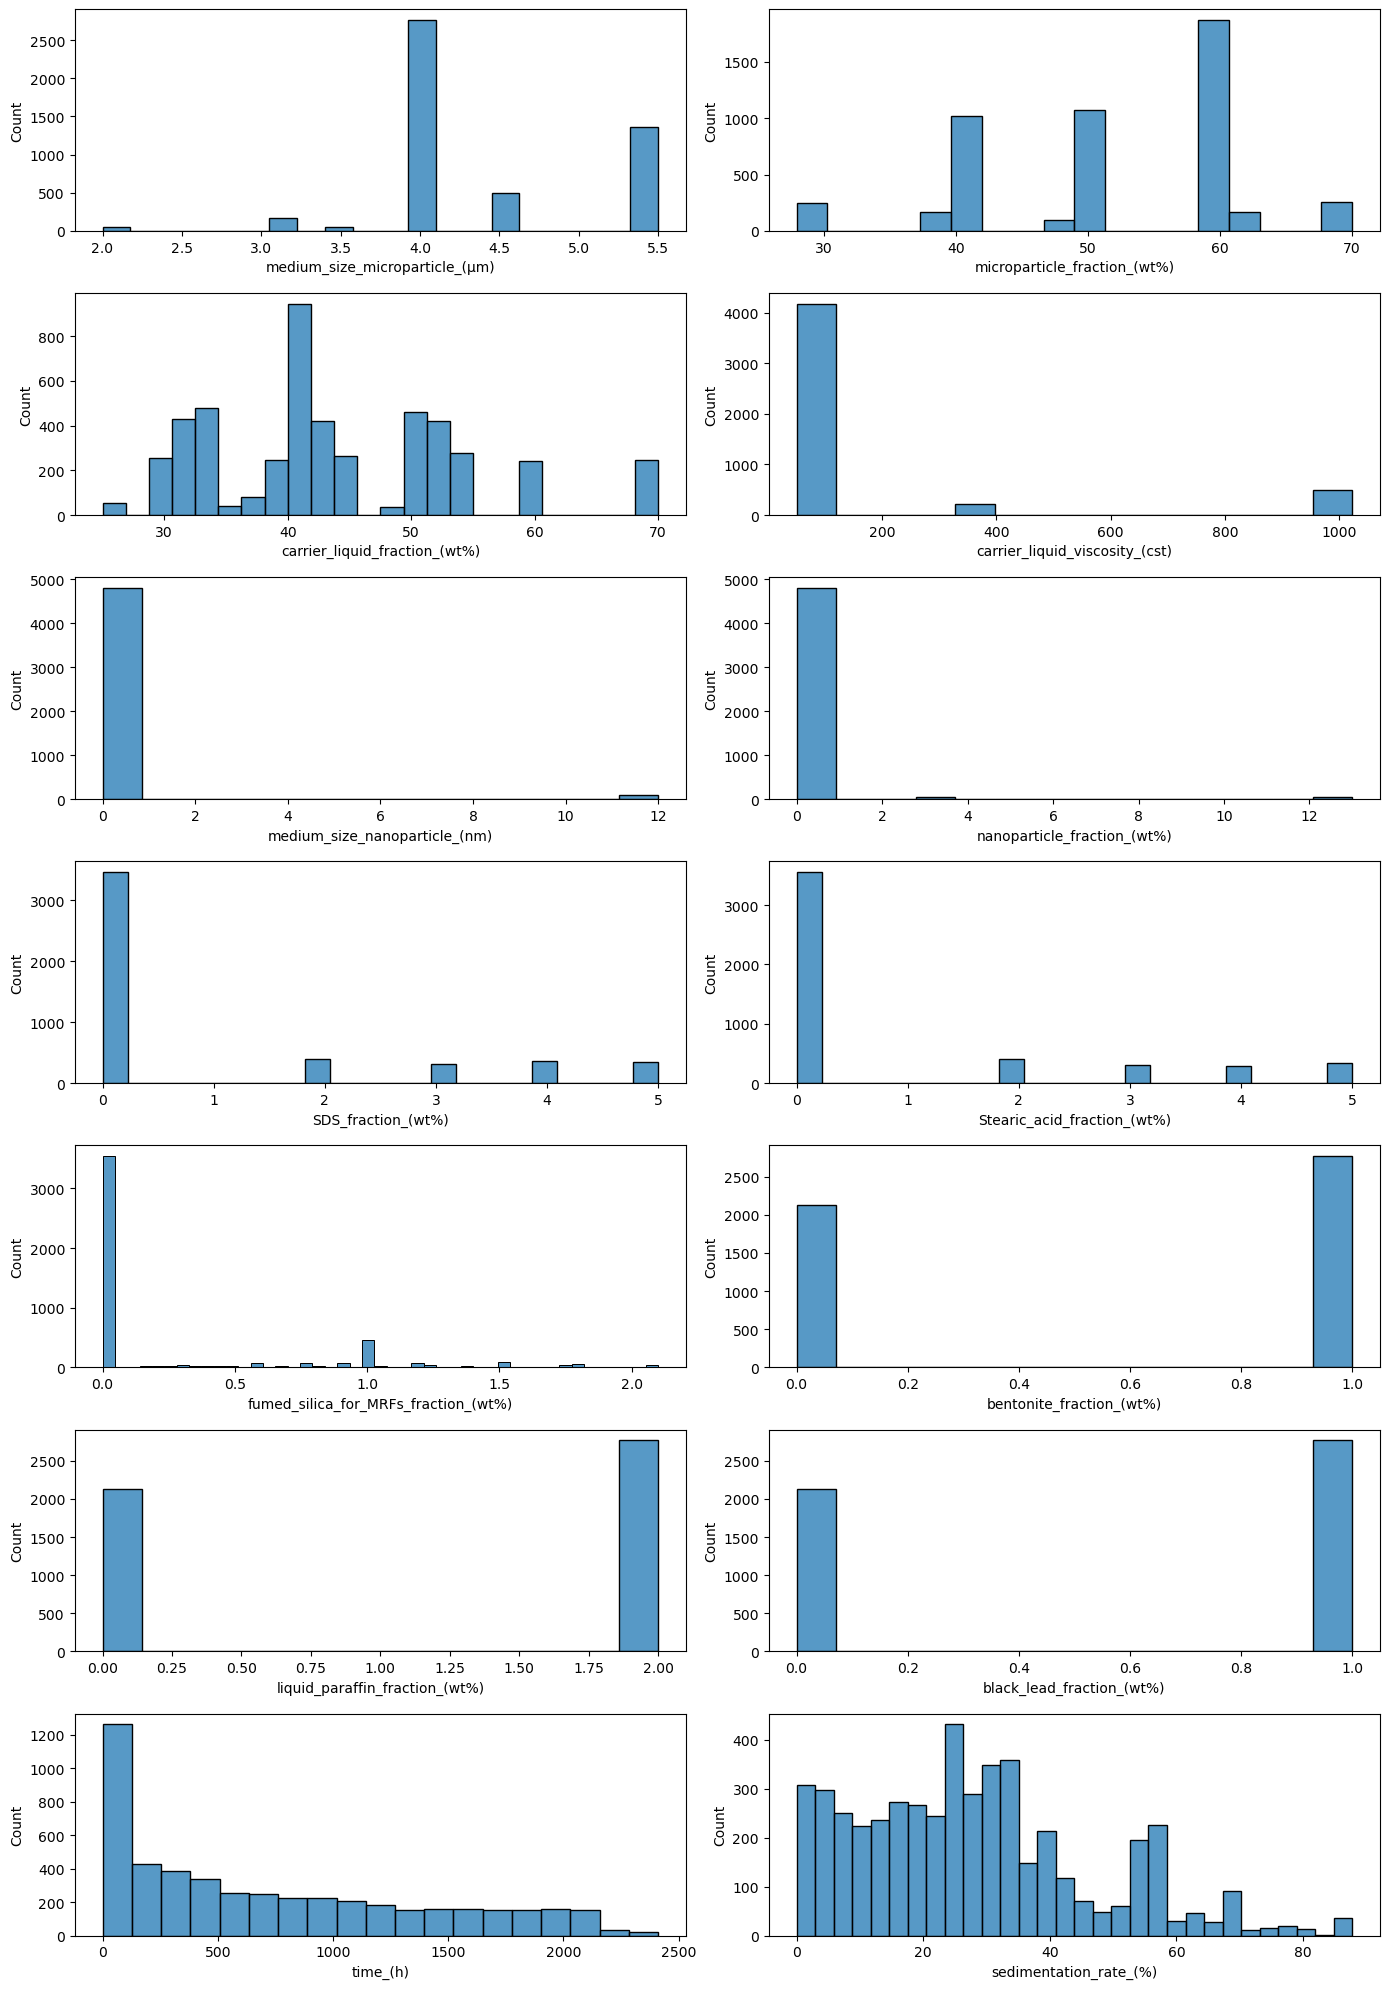

In [108]:
# Analyze data distribution

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2)

row = 0
column = 0
for i in numeric_variables:
    sns.histplot(data = df_clean, x=i, ax=axes[row][column])
    column += 1
    if column == 2:
        row += 1
        column = 0            

plt.show()

In [109]:
#Creating a dictionary to store test results
normality_results = {}

In [110]:
for column in numeric_variables:
    #Getting column data
    data = df_clean[column]
    
#Calculating the mean and standard deviation of data
    mean = np.nanmean(data)
    std_dev = np.nanstd(data)
    
#Applying the Kolmogorov-Smirnov Test for normality
#Comparing the empirical distribution of data with the normal distribution
    stat, p_value = stats.kstest(data, 'norm', args=(mean, std_dev))

#Storing the results in the dictionary
    normality_results[column] = {'statistic': stat, 'p_value': p_value}

In [111]:
#Print results
for column, result in normality_results.items():
    print(f'Variable: {column}')
    print(f'  Statistic: {result["statistic"]:.5f}')
    print(f'  p_value: {result["p_value"]:.5f}')
    if result["p_value"] > 0.05:
        print('  The variable appears to be normal (p > 0.05)')
    else:
        print('  The variable does not appear to be normal (p <= 0.05)')
    print('---')

Variable: medium_size_microparticle_(μm)
  Statistic: 0.33320
  p_value: 0.00000
  The variable does not appear to be normal (p <= 0.05)
---
Variable: microparticle_fraction_(wt%)
  Statistic: 0.22420
  p_value: 0.00000
  The variable does not appear to be normal (p <= 0.05)
---
Variable: carrier_liquid_fraction_(wt%)
  Statistic: 0.14412
  p_value: 0.00000
  The variable does not appear to be normal (p <= 0.05)
---
Variable: carrier_liquid_viscosity_(cst)
  Statistic: 0.49832
  p_value: 0.00000
  The variable does not appear to be normal (p <= 0.05)
---
Variable: medium_size_nanoparticle_(nm)
  Statistic: 0.53614
  p_value: 0.00000
  The variable does not appear to be normal (p <= 0.05)
---
Variable: nanoparticle_fraction_(wt%)
  Statistic: 0.52893
  p_value: 0.00000
  The variable does not appear to be normal (p <= 0.05)
---
Variable: SDS_fraction_(wt%)
  Statistic: 0.43324
  p_value: 0.00000
  The variable does not appear to be normal (p <= 0.05)
---
Variable: Stearic_acid_fraction_

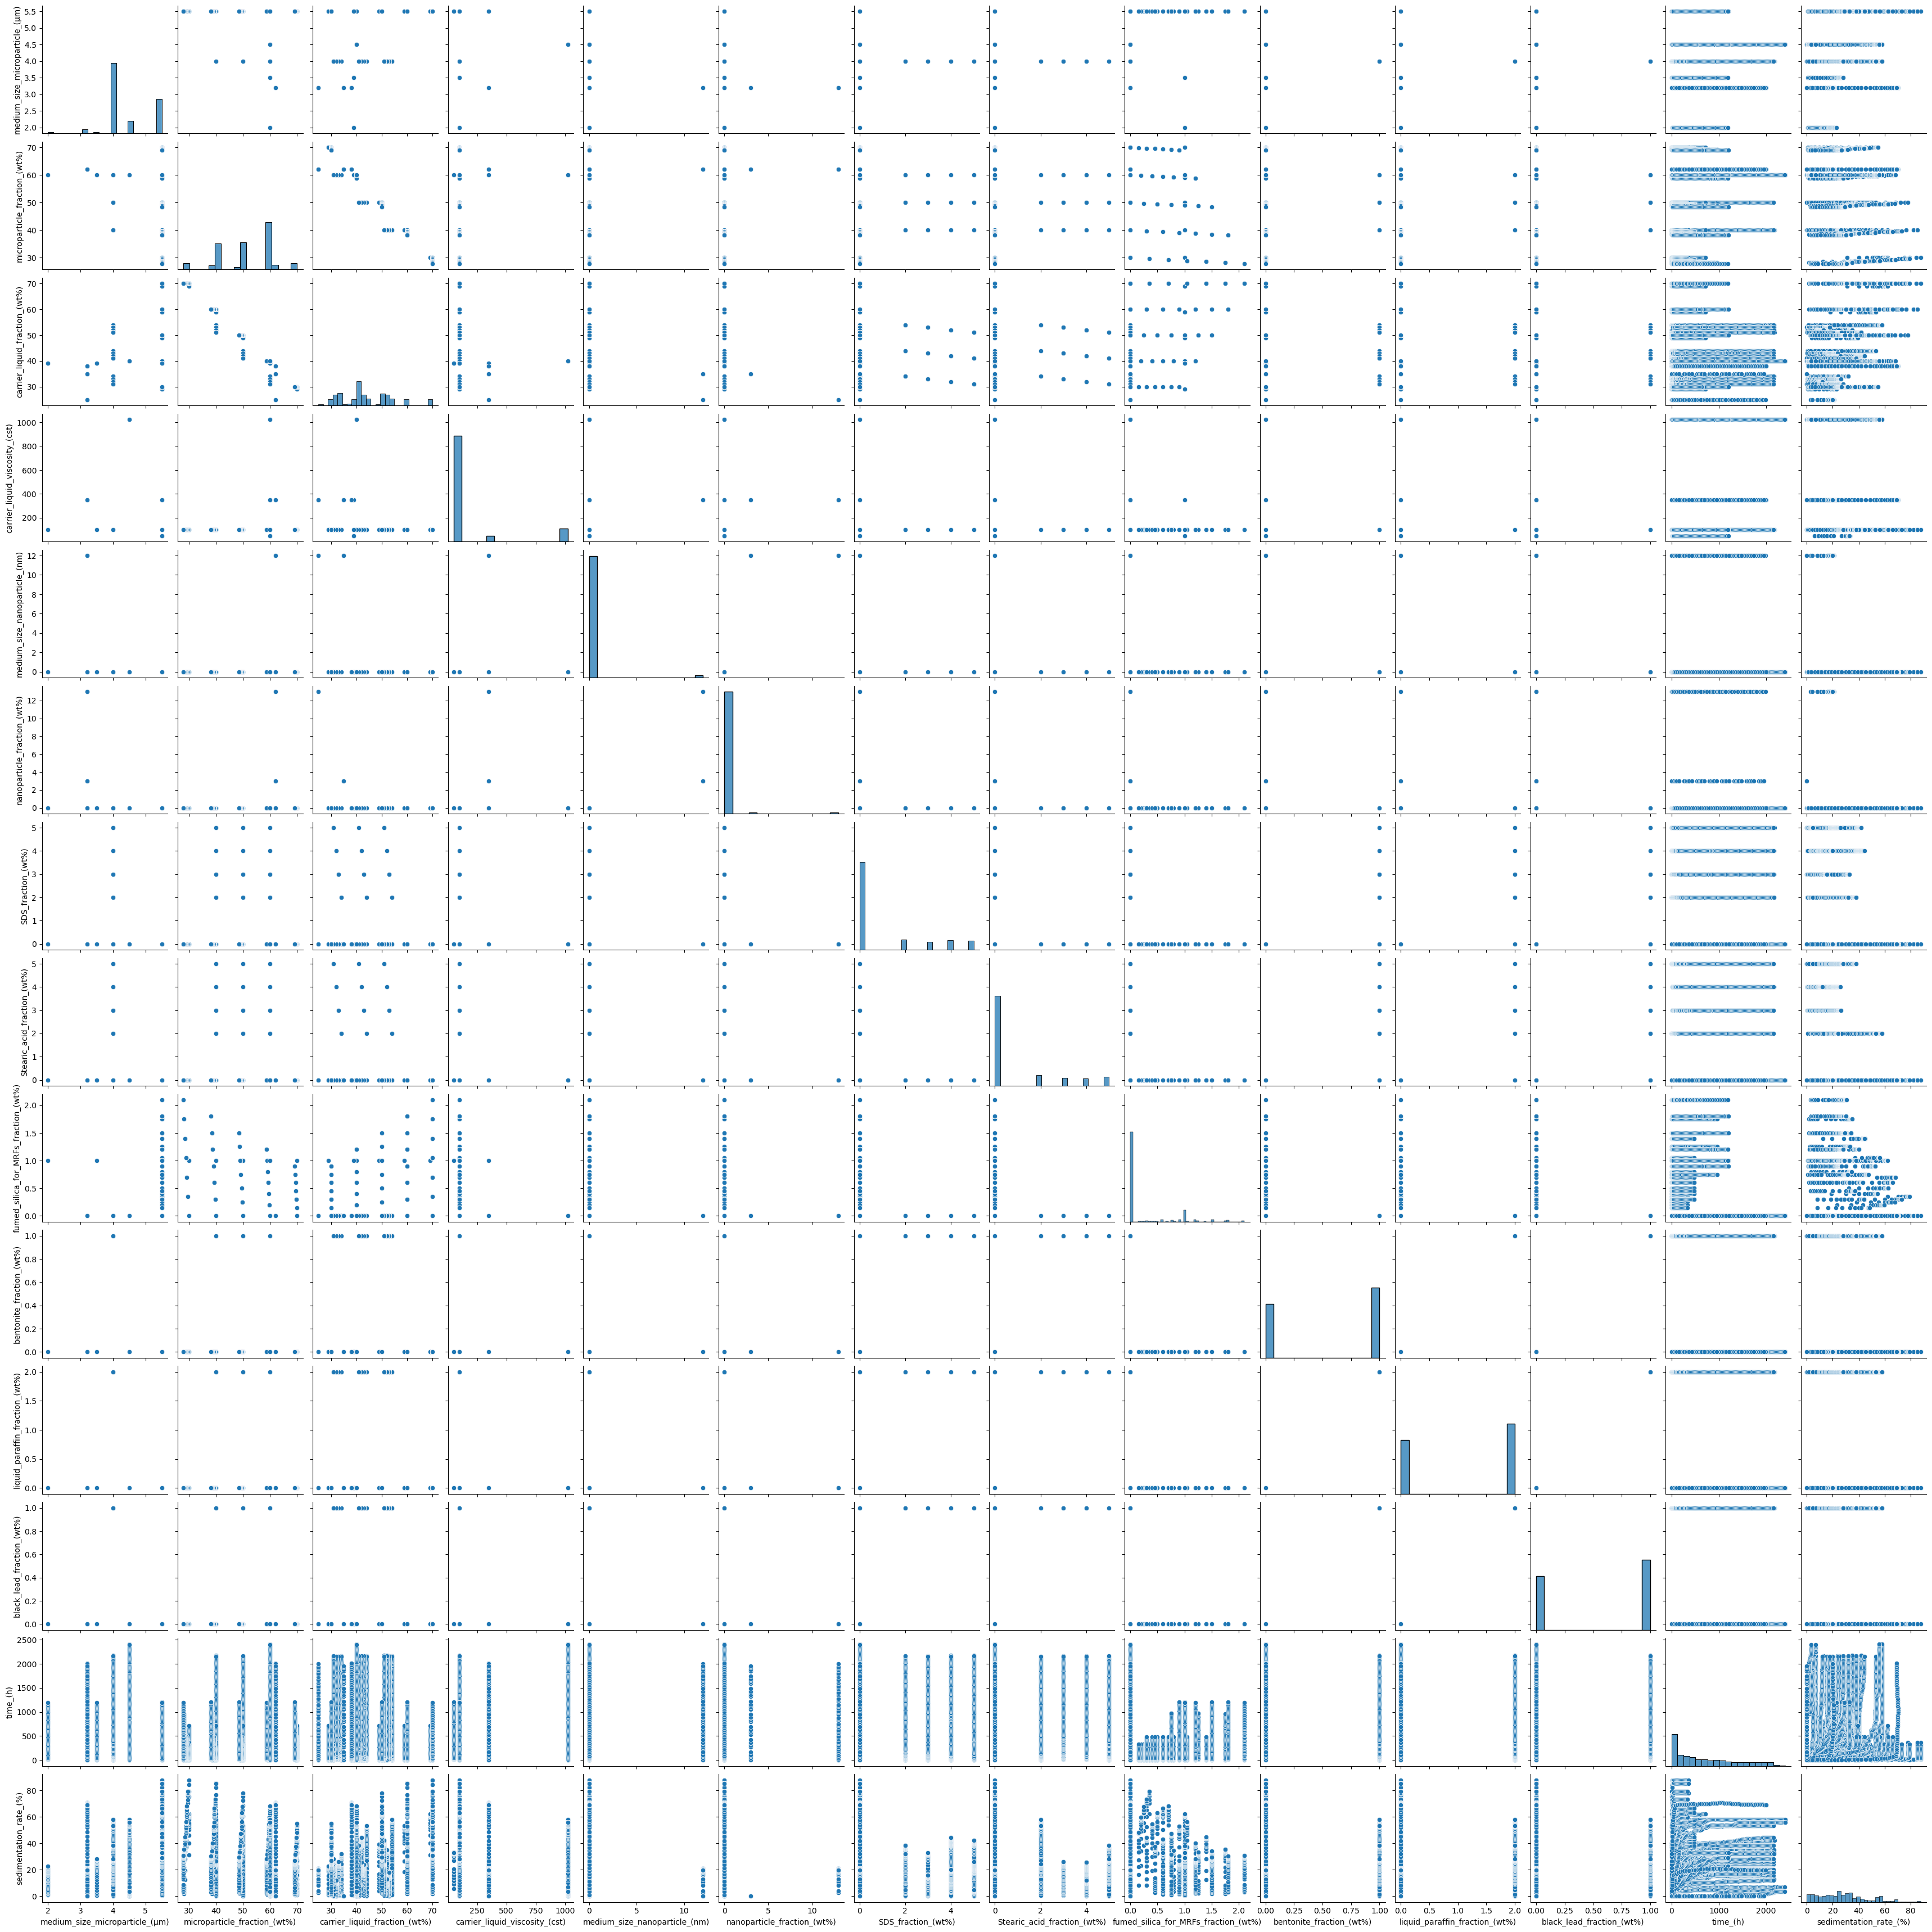

In [112]:
sns.pairplot(df_clean[['medium_size_microparticle_(μm)', 'microparticle_fraction_(wt%)', 'carrier_liquid_fraction_(wt%)', 'carrier_liquid_viscosity_(cst)', 'medium_size_nanoparticle_(nm)', 'nanoparticle_fraction_(wt%)',  'SDS_fraction_(wt%)', 'Stearic_acid_fraction_(wt%)', 'fumed_silica_for_MRFs_fraction_(wt%)', 'bentonite_fraction_(wt%)', 'liquid_paraffin_fraction_(wt%)', 'black_lead_fraction_(wt%)', 'time_(h)', 'sedimentation_rate_(%)']])

In [113]:
# Treating string data, create the encoder.

lb = LabelEncoder()

for var in ['coating_type','carrier_liquid_type','nanoparticle_type']:
    df_clean[var] = lb.fit_transform(df_clean[var])

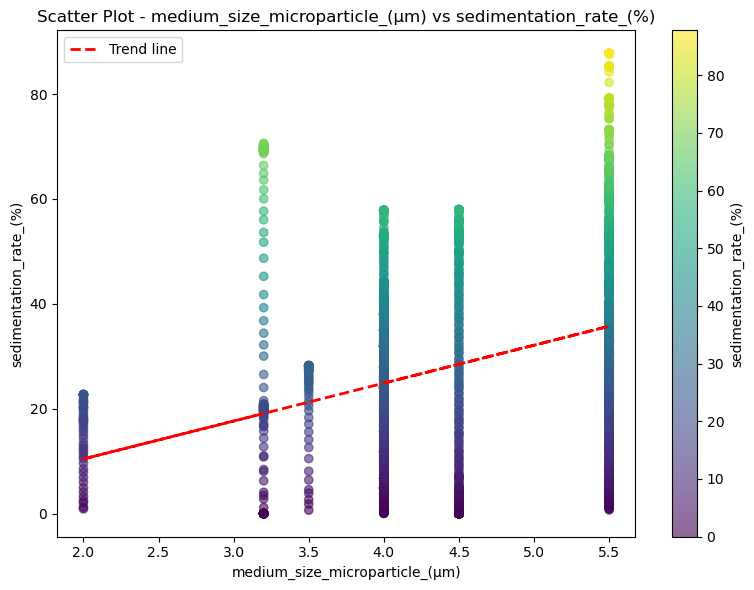

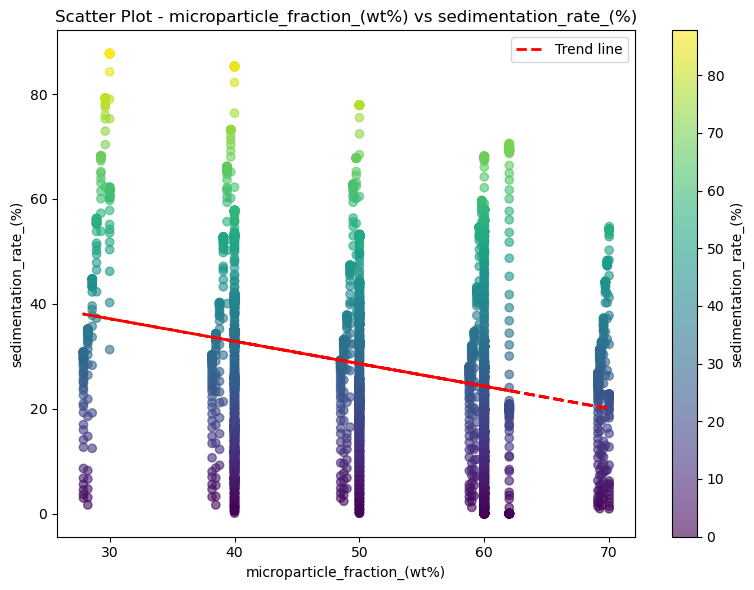

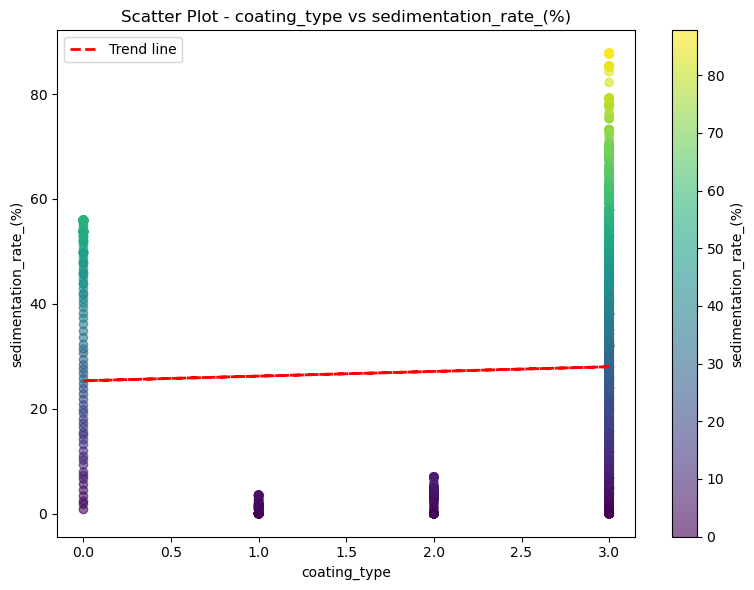

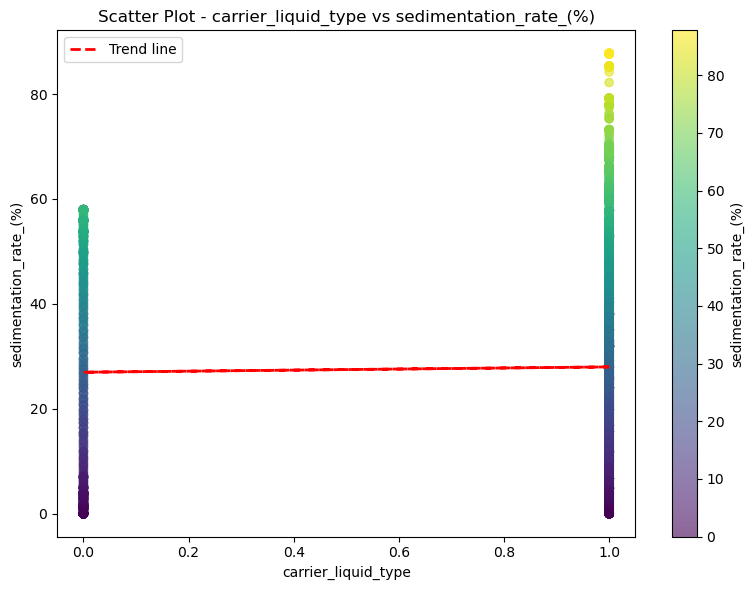

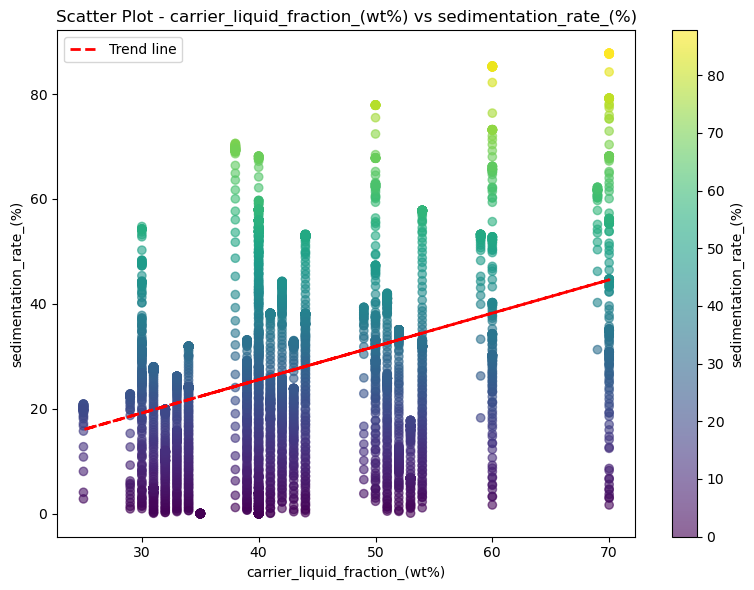

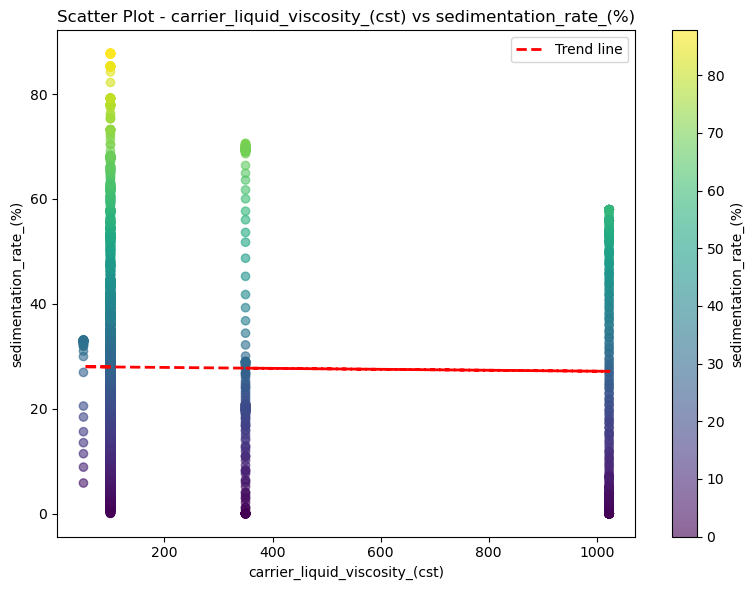

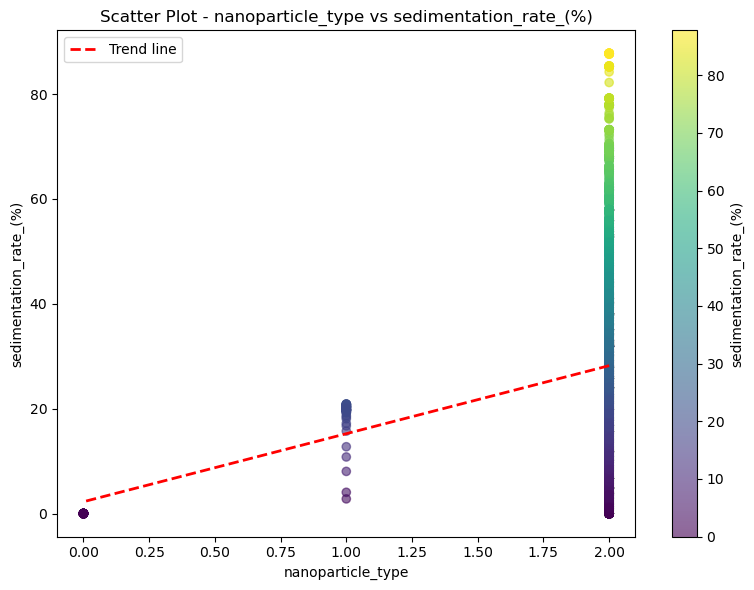

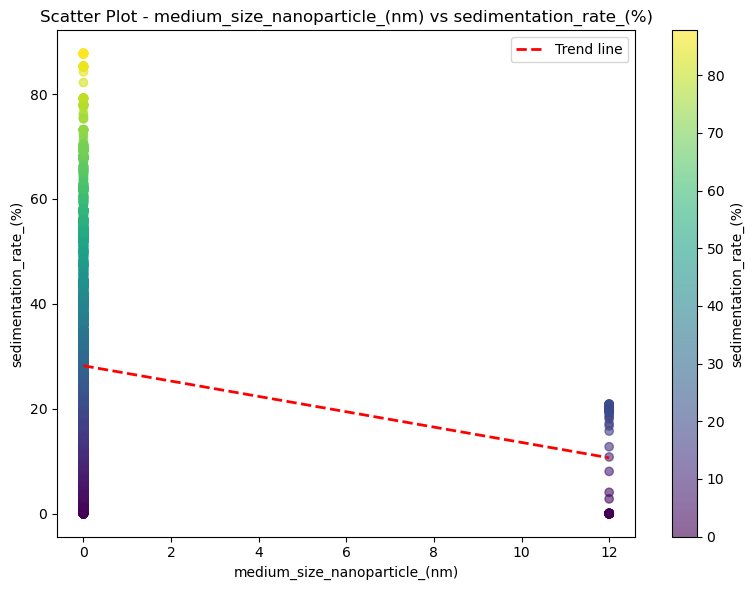

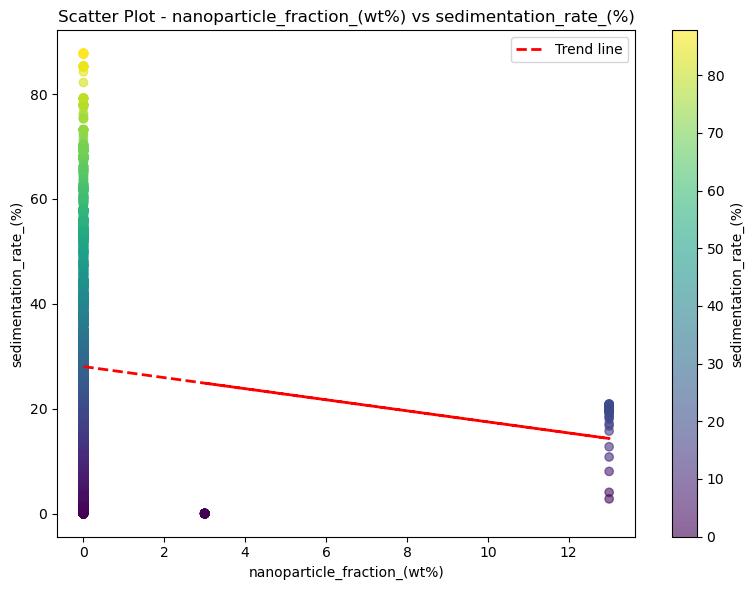

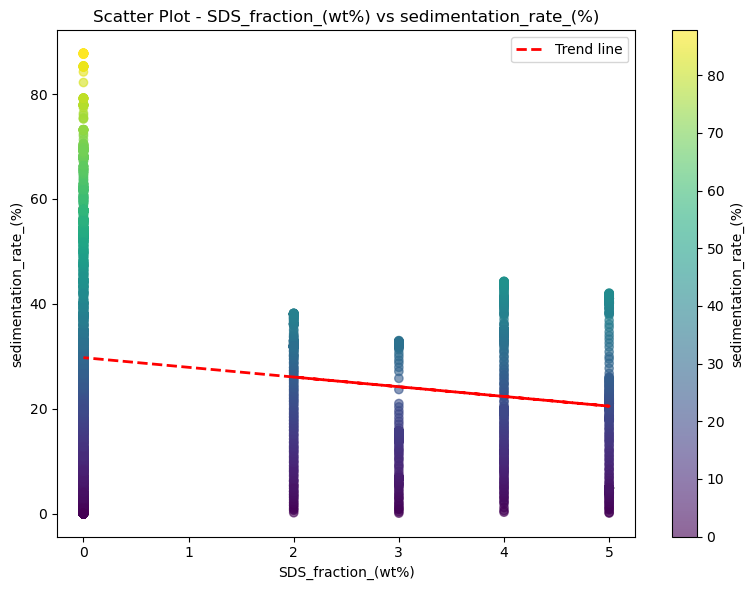

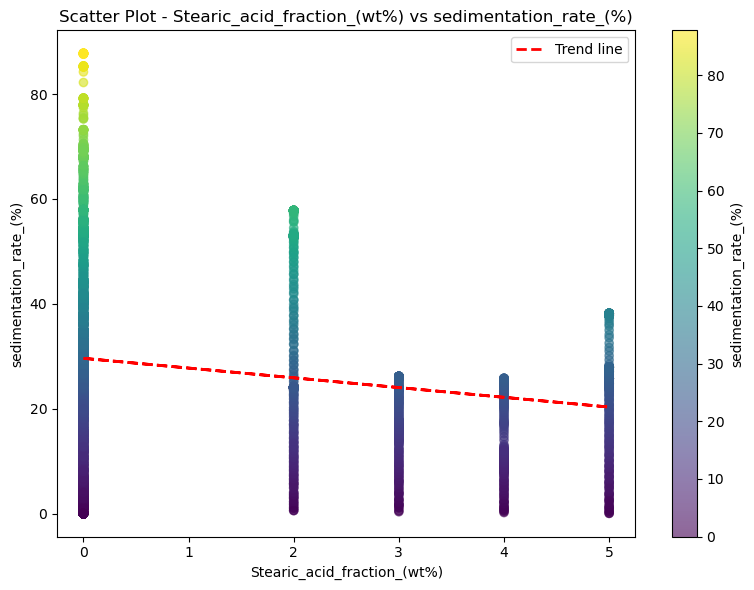

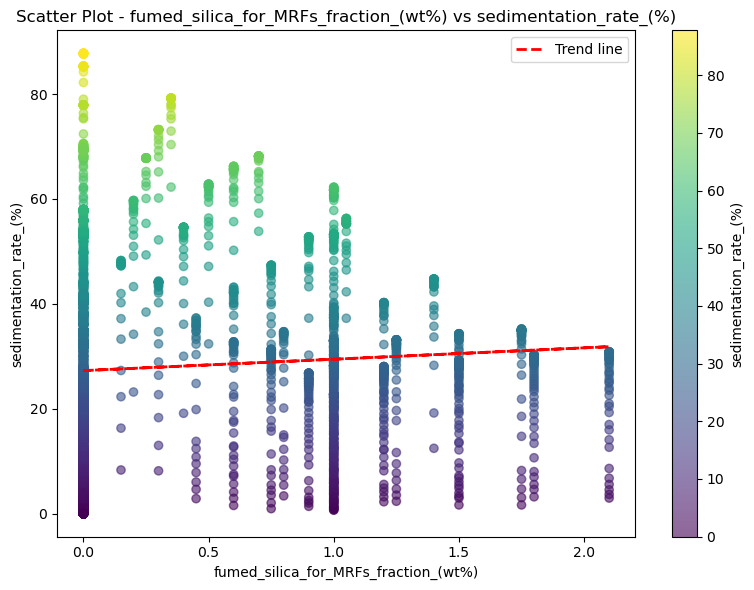

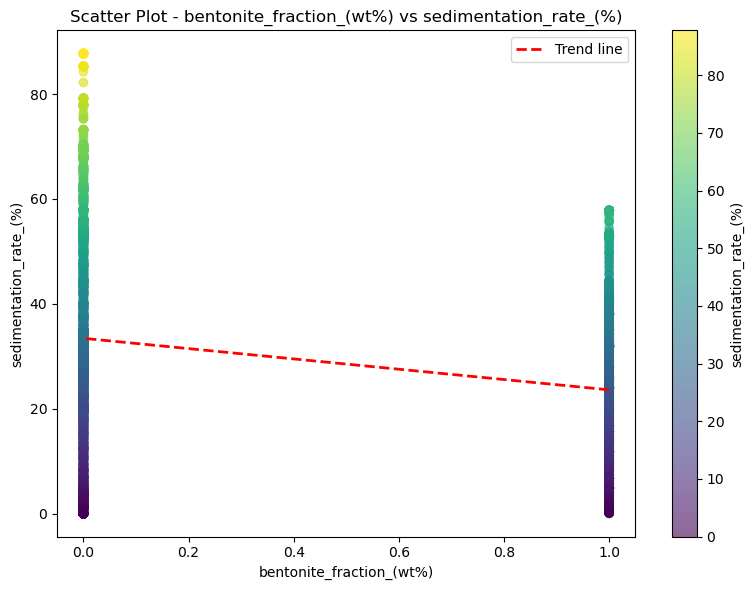

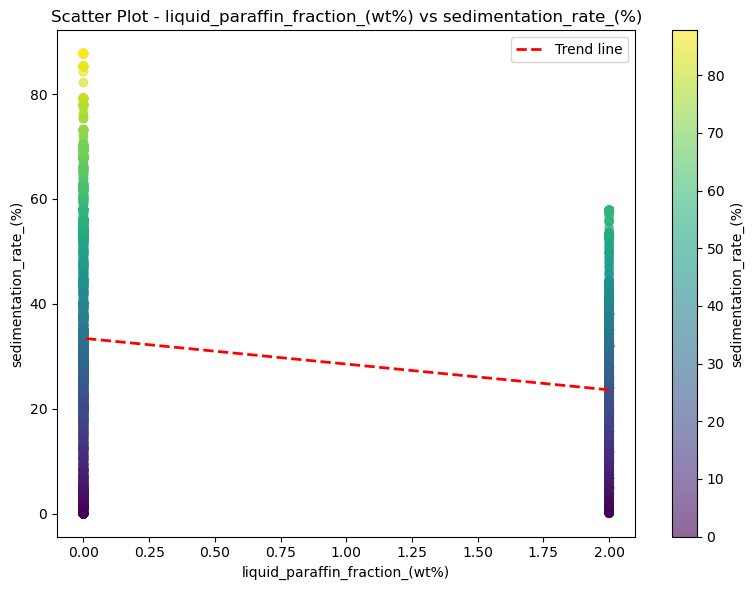

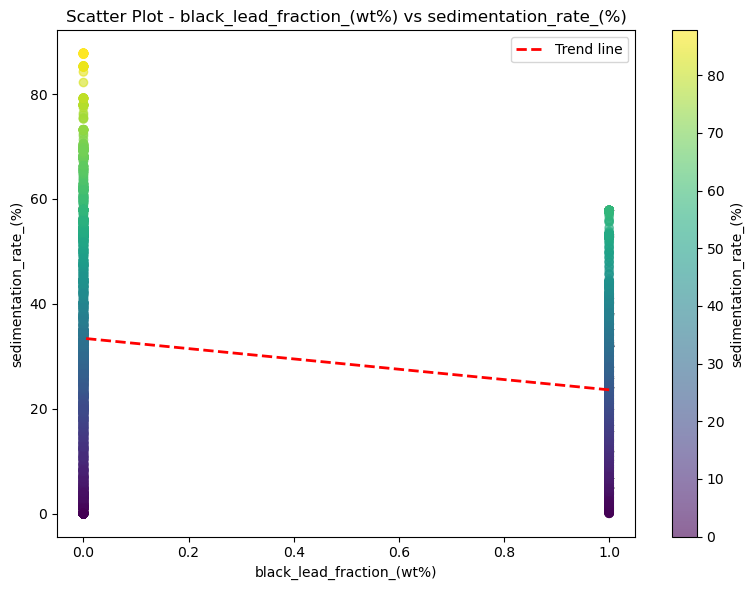

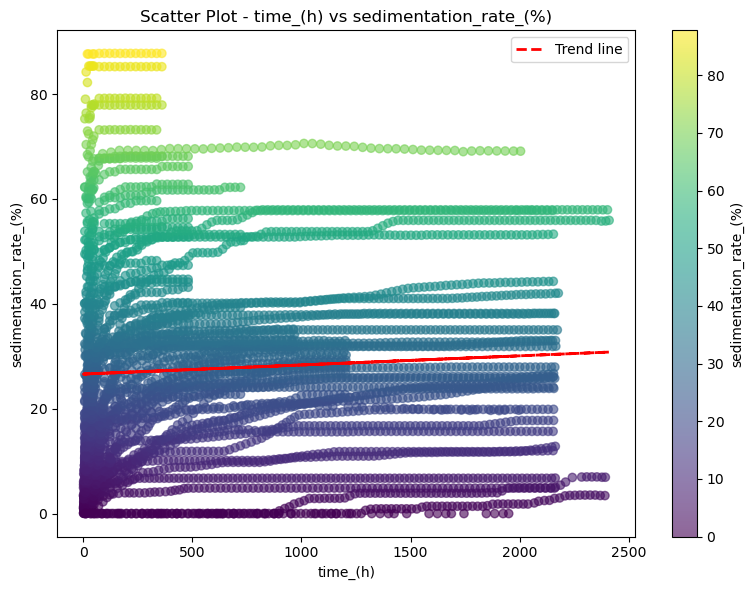

In [114]:
target_col = 'sedimentation_rate_(%)'

for col in df_clean.columns:
    if col == target_col:
        continue  
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df_clean[col], df_clean[target_col], alpha=0.6, c=df_clean[target_col], cmap='viridis')
    plt.title(f'Scatter Plot - {col} vs {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)

    # Trend. line
    z = np.polyfit(df_clean[col], df_clean[target_col], 1)
    p = np.poly1d(z)
    plt.plot(df_clean[col], p(df_clean[col]), "r--", linewidth=2, label='Trend line')
    plt.legend()

    plt.colorbar(label=target_col)
    plt.tight_layout()
    plt.show()


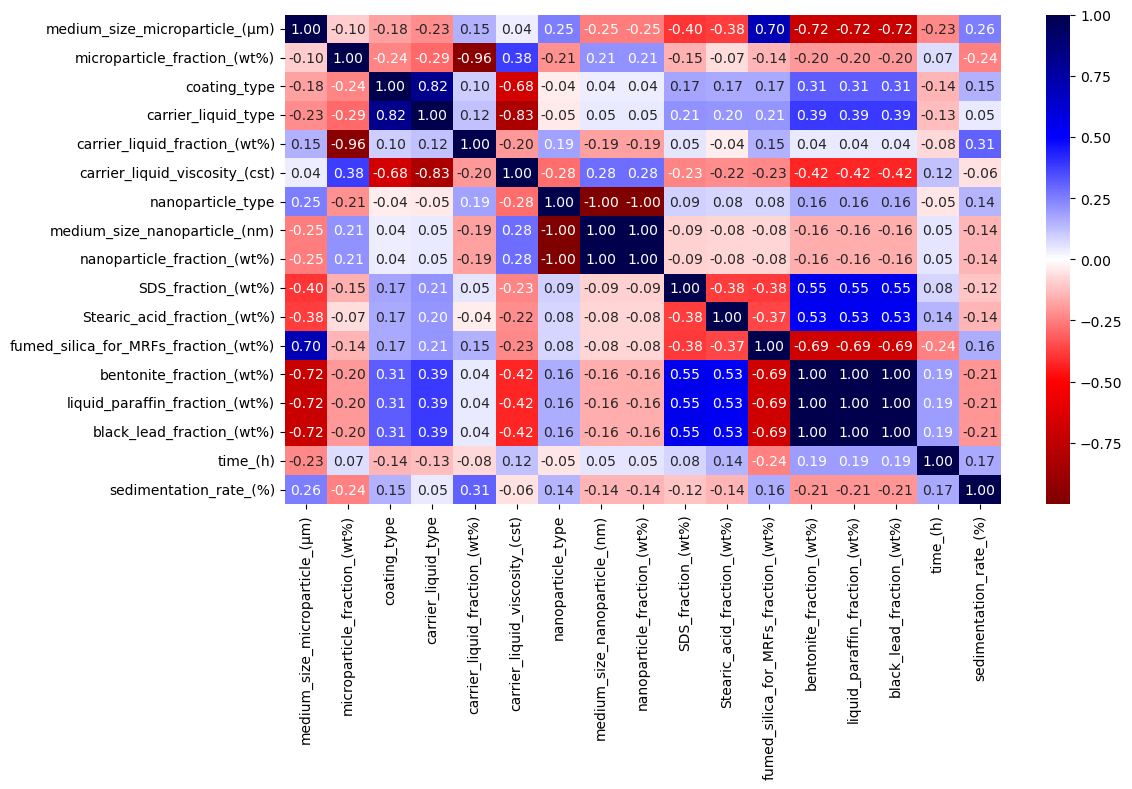

In [115]:
#Correlation between variables (Spearman)
corr_spearman = df_clean.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_spearman, annot=True, cmap='seismic_r', fmt='.2f')
plt.show()

In [116]:
df_clean['sedimentation_rate_(%)'] = df_clean['sedimentation_rate_(%)']/100

In [117]:
#Separating predictor and target variables

X = df_clean[ df_clean.columns[:-1]]
y = df_clean[ df_clean.columns[-1:]]

In [118]:
#Scale the data
stdScaler = StandardScaler()
 
# z = (x - u) /s
X1 = stdScaler.fit_transform(X) 

In [119]:
#Splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state = 42)

In [120]:
#Converting 'y' to one-dimensional (1D) vector to avoid warnings
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [121]:
#Linear Regression (LR) model
regressor_LR = LinearRegression()

In [122]:
#Training the model
regressor_LR = regressor_LR.fit(X_train, y_train)

In [123]:
#Calculating predictions for the training and testing set
y_train_pred_LR = regressor_LR.predict(X_train)
y_test_pred_LR = regressor_LR.predict(X_test)

In [124]:
# The coefficients
print("Coefficients: \n", regressor_LR.coef_)

Coefficients: 
 [ 2.43174715e-02 -2.40808468e+12  7.96417011e-03  8.35017396e-02
 -2.39558630e+12 -1.89222426e-02  1.20750613e+12  1.83512738e+12
 -1.11685232e+12 -3.93743089e+11 -3.82671619e+11 -1.17325142e+11
 -1.53697370e+11 -1.53697370e+11 -1.53697370e+11  5.09890892e-02]


In [125]:
print("Intercept: ", regressor_LR.intercept_)

Intercept:  0.2816914420191252


In [126]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_LR):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_LR):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_LR):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_LR):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_LR):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_LR):.5f}")


R2 Train: 0.49273
R2 Test: 0.43847
RMSE Train: 0.13252
RMSE Test: 0.14199
MAE Train: 0.10093
MAE Test: 0.11008


In [127]:
#Function to show R2 on the graph
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['sedimentation_rate_(%)'], data['Predicted'])
    r = float(r) ** 2
    err = root_mean_squared_error(data['sedimentation_rate_(%)'], data['Predicted'])
    ax = plt.gca()

    ax.text(.05, .8, 'r2={:.5f}, p={:.5f}, RMSE={:.5f}'.format(r, p, err),
            transform=ax.transAxes)

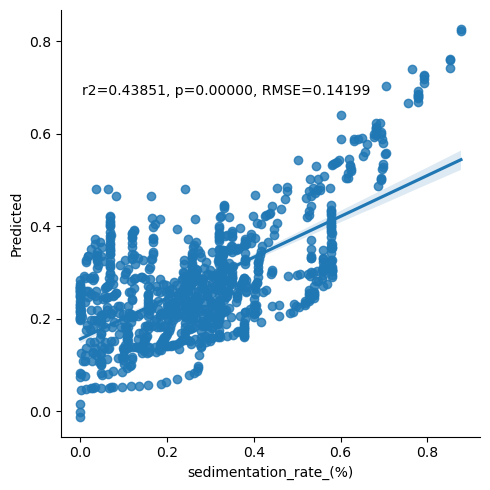

In [128]:
#Visualization Multiple Linear Regression
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_LR

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

In [129]:
#Multi-Layer Perceptron (MLP) model
regressor_MLP = MLPRegressor(solver='adam', hidden_layer_sizes=(100, 200), 
                           n_iter_no_change=100, random_state=42, max_iter=10000, 
                           learning_rate_init=0.0001, verbose=True)


Iteration 1, loss = 0.03067465
Iteration 2, loss = 0.01622243
Iteration 3, loss = 0.01176175
Iteration 4, loss = 0.00951642
Iteration 5, loss = 0.00818294
Iteration 6, loss = 0.00711903
Iteration 7, loss = 0.00634699
Iteration 8, loss = 0.00575492
Iteration 9, loss = 0.00527321
Iteration 10, loss = 0.00484599
Iteration 11, loss = 0.00452084
Iteration 12, loss = 0.00426854
Iteration 13, loss = 0.00404735
Iteration 14, loss = 0.00388323
Iteration 15, loss = 0.00370777
Iteration 16, loss = 0.00357329
Iteration 17, loss = 0.00346153
Iteration 18, loss = 0.00334987
Iteration 19, loss = 0.00325814
Iteration 20, loss = 0.00317342
Iteration 21, loss = 0.00309211
Iteration 22, loss = 0.00300202
Iteration 23, loss = 0.00294431
Iteration 24, loss = 0.00286272
Iteration 25, loss = 0.00283630
Iteration 26, loss = 0.00276172
Iteration 27, loss = 0.00269000
Iteration 28, loss = 0.00265730
Iteration 29, loss = 0.00258521
Iteration 30, loss = 0.00253387
Iteration 31, loss = 0.00247355
Iteration 32, los

<Axes: >

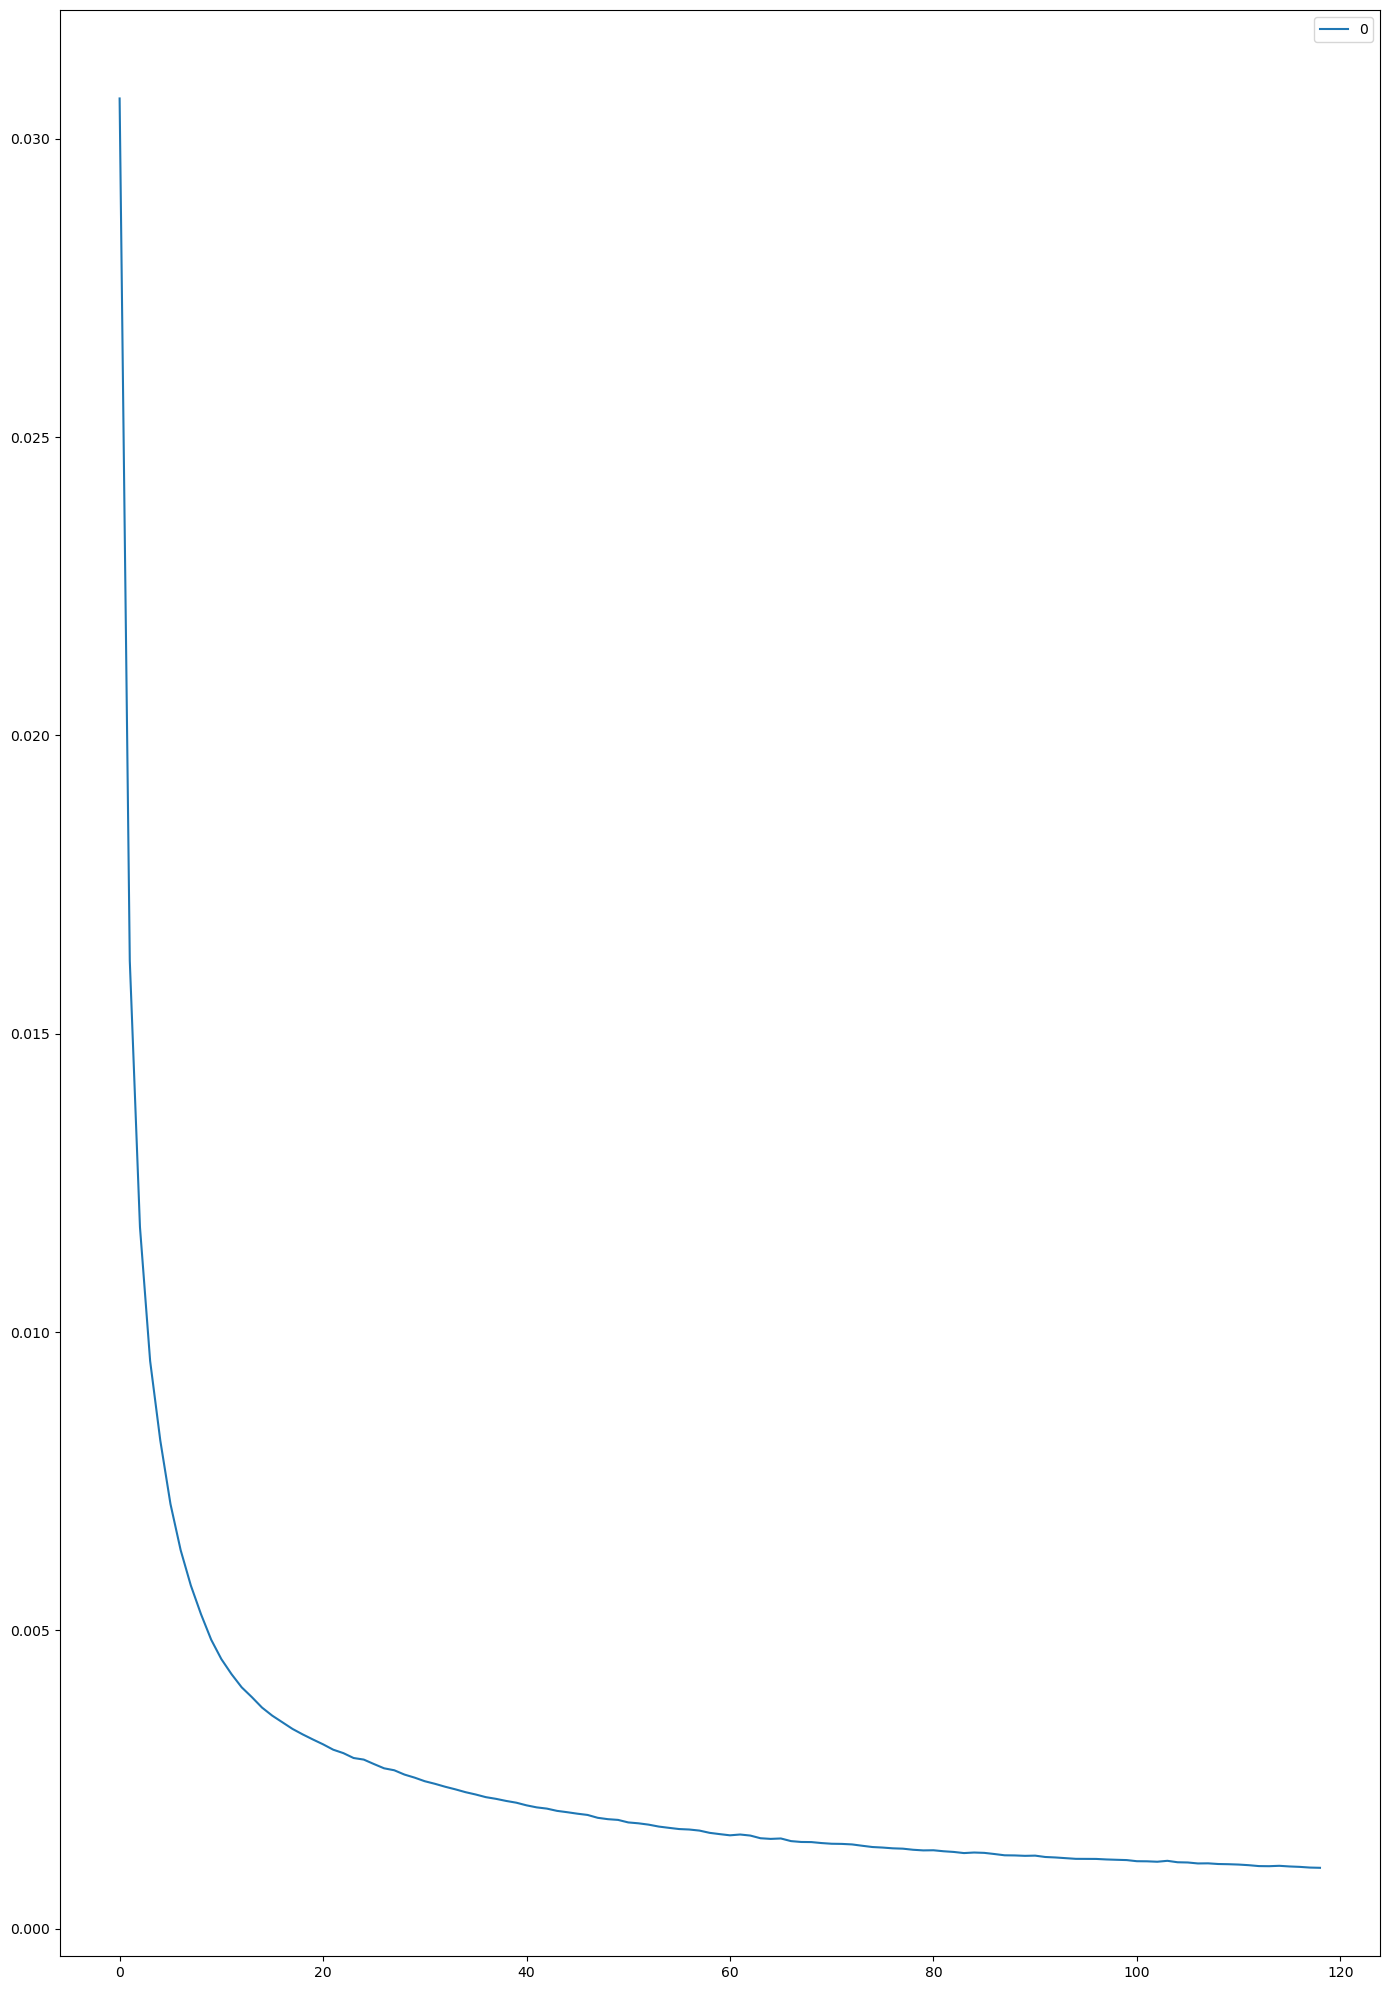

In [130]:
#Training the model
regressor_MLP.fit(X_train, y_train)

#Plotting the loss curve
pd.DataFrame(regressor_MLP.loss_curve_).plot()

In [131]:
#Calculating predictions for the training and testing set
y_train_pred_MLP = regressor_MLP.predict(X_train)
y_test_pred_MLP = regressor_MLP.predict(X_test)

In [132]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_MLP):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_MLP):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_MLP):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_MLP):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_MLP):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_MLP):.5f}")

R2 Train: 0.94347
R2 Test: 0.93050
RMSE Train: 0.04424
RMSE Test: 0.04995
MAE Train: 0.02913
MAE Test: 0.03248


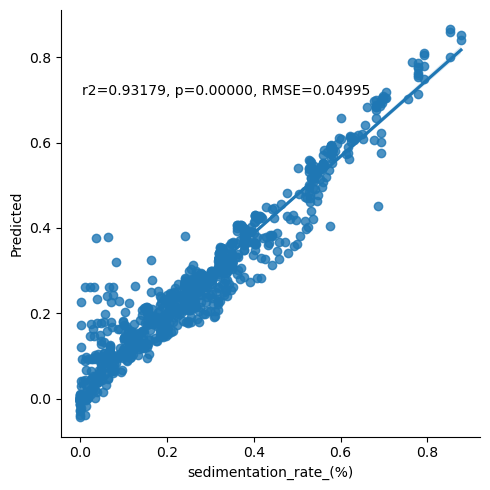

In [133]:
#Visualization Multi-Layer Perceptron
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_MLP

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

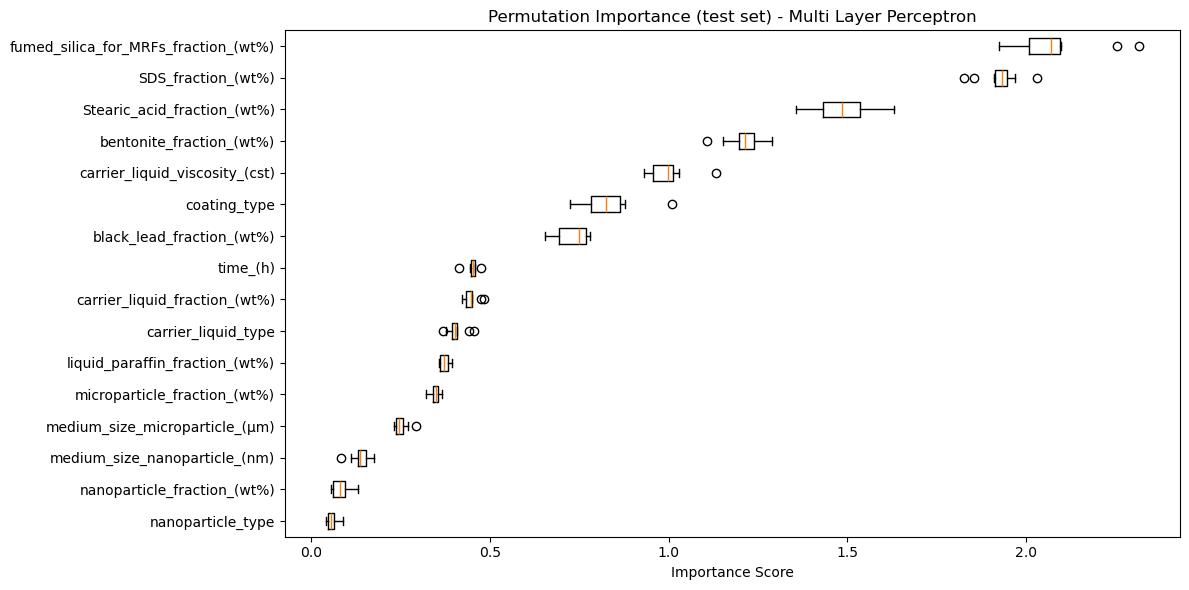

In [134]:
#Permutation in a Multi-Layer Perceptron model
#Calculation of the importance of variables by permutation
result = permutation_importance(
    regressor_MLP, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

#Ordering the importance indices
sorted_idx_perm = result.importances_mean.argsort()

#Configuring the chart to display importance by permutation
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(
    result.importances[sorted_idx_perm].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx_perm]
)
ax.set_title("Permutation Importance (test set) - Multi Layer Perceptron")
ax.set_xlabel("Importance Score")

fig.tight_layout()
plt.show()

In [135]:
#Decision Tree (DT) Regressor model
regressor_DT = DecisionTreeRegressor(random_state=42)

In [136]:
#Training the modelo
regressor_DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [137]:
#Calculating predictions for the training and testing set
y_train_pred_DT = regressor_DT.predict(X_train)
y_test_pred_DT = regressor_DT.predict(X_test)

In [138]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_DT):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_DT):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_DT):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_DT):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_DT):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_DT):.5f}")

R2 Train: 0.99980
R2 Test: 0.99321
RMSE Train: 0.00264
RMSE Test: 0.01561
MAE Train: 0.00034
MAE Test: 0.00606


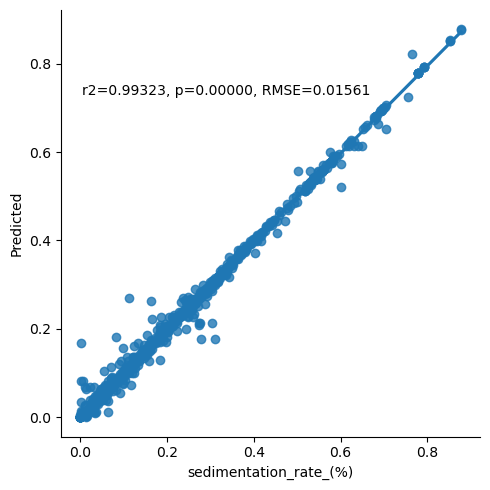

In [139]:
#Visualization Decision Tree
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_DT

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

[5.62812558e-03 1.13658506e-01 1.28568651e-01 3.50551119e-02
 3.26508715e-01 2.88294273e-03 9.70528289e-03 0.00000000e+00
 7.37303506e-04 7.03629653e-02 1.95170153e-02 1.24701074e-01
 7.09675133e-06 1.39214451e-02 1.04979136e-06 1.48744715e-01]


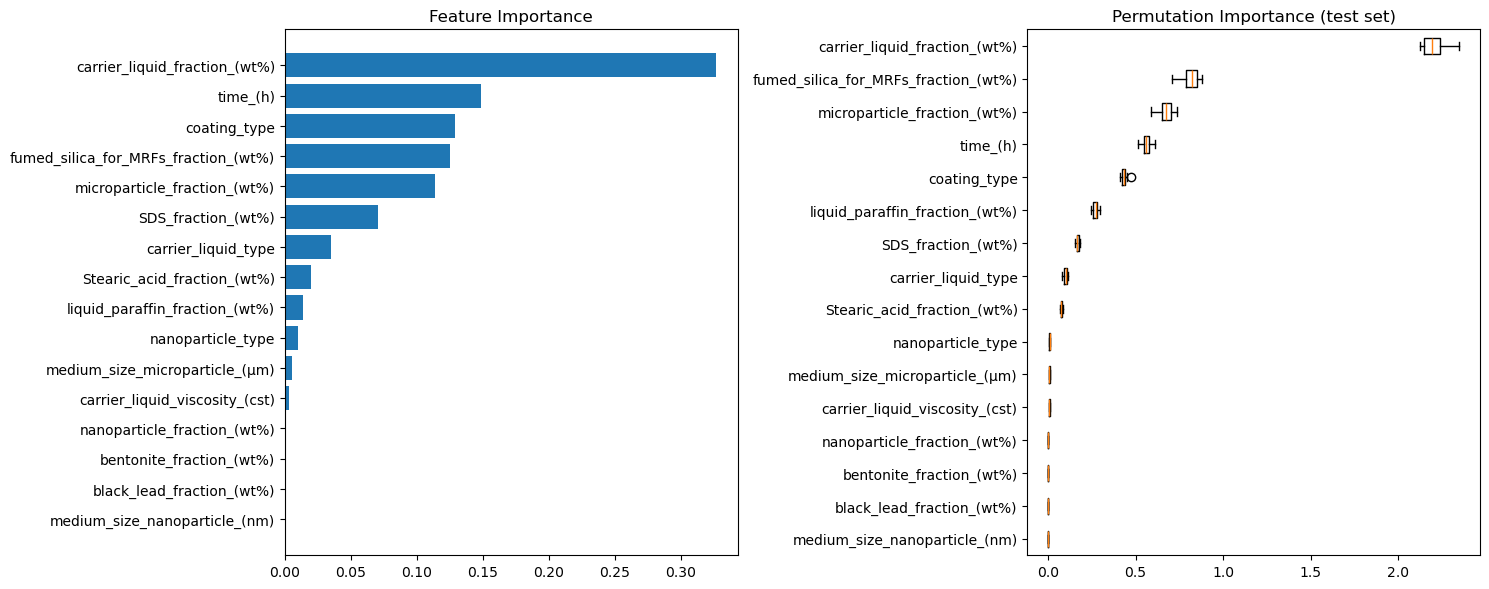

In [140]:
#Feature importance in a Decision Tree model
feature_importance = regressor_DT.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    regressor_DT, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [141]:
#Random Forest (RF) Regressor model
regressor_RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [142]:
#Training the model
regressor_RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [143]:
#Calculating predictions for the training and testing set
y_train_pred_RF = regressor_RF.predict(X_train)
y_test_pred_RF = regressor_RF.predict(X_test)

In [144]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_RF):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_RF):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_RF):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_RF):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_RF):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_RF):.5f}")

R2 Train: 0.99912
R2 Test: 0.99651
RMSE Train: 0.00552
RMSE Test: 0.01119
MAE Train: 0.00202
MAE Test: 0.00472


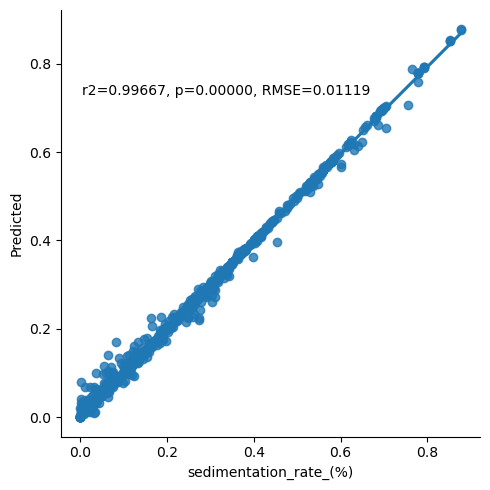

In [145]:
#Visualization Random Forest
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_RF

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

[0.02615658 0.05936809 0.12443934 0.01608374 0.31111073 0.00646432
 0.00523676 0.00033906 0.00043595 0.08342593 0.05270151 0.15503324
 0.00258624 0.00261828 0.00287868 0.15112154]


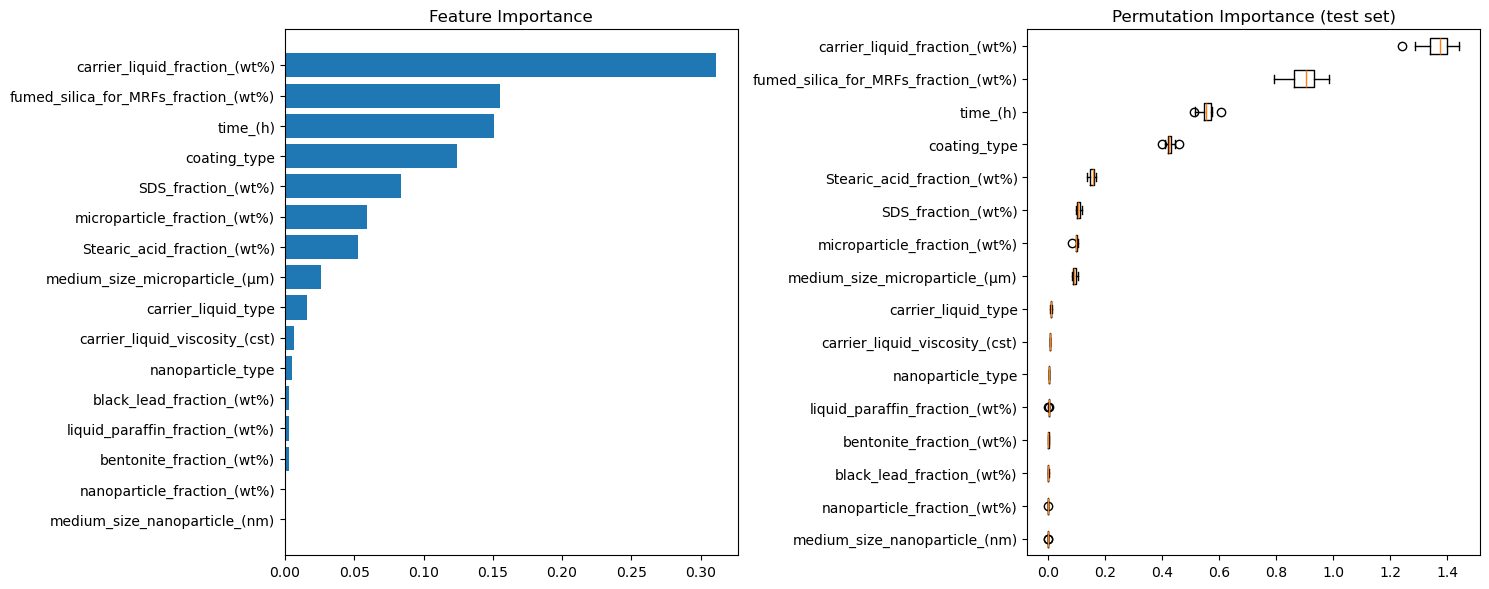

In [146]:
#Feature importance in a Random Forest model
feature_importance = regressor_RF.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    regressor_RF, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [147]:
#Gradient Boosting (GB) Regressor model
params_boosting = {
    "n_estimators": 1000,
    "max_depth": 10,
    "min_samples_split": 20,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [148]:
#Training the model
regressor_GB = GradientBoostingRegressor(**params_boosting)
regressor_GB.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                          min_samples_split=20, n_estimators=1000)

In [149]:
#Calculating predictions for the training and testing set
y_train_pred_GB = regressor_GB.predict(X_train)
y_test_pred_GB = regressor_GB.predict(X_test)

In [150]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_GB):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_GB):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_GB):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_GB):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_GB):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_GB):.5f}")

R2 Train: 0.99957
R2 Test: 0.99710
RMSE Train: 0.00387
RMSE Test: 0.01020
MAE Train: 0.00186
MAE Test: 0.00501


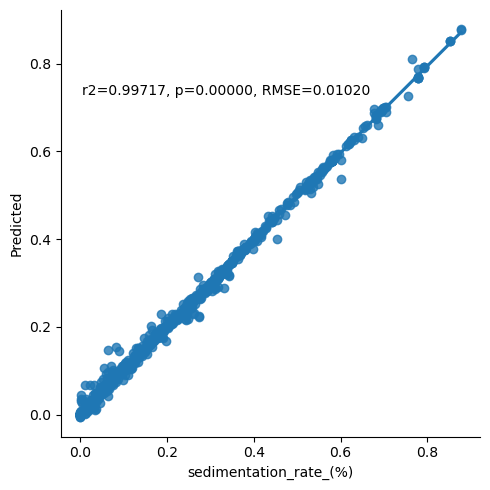

In [151]:
#Visualization Gradient Boosting
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_GB

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

[1.24553672e-02 6.99890671e-02 1.30479658e-01 1.31906781e-02
 3.53763326e-01 1.90227895e-02 5.75343613e-03 2.29841987e-04
 2.76616388e-04 8.45043397e-02 2.79400569e-02 1.31274413e-01
 3.54642315e-03 3.54532742e-03 3.36456571e-03 1.40664094e-01]


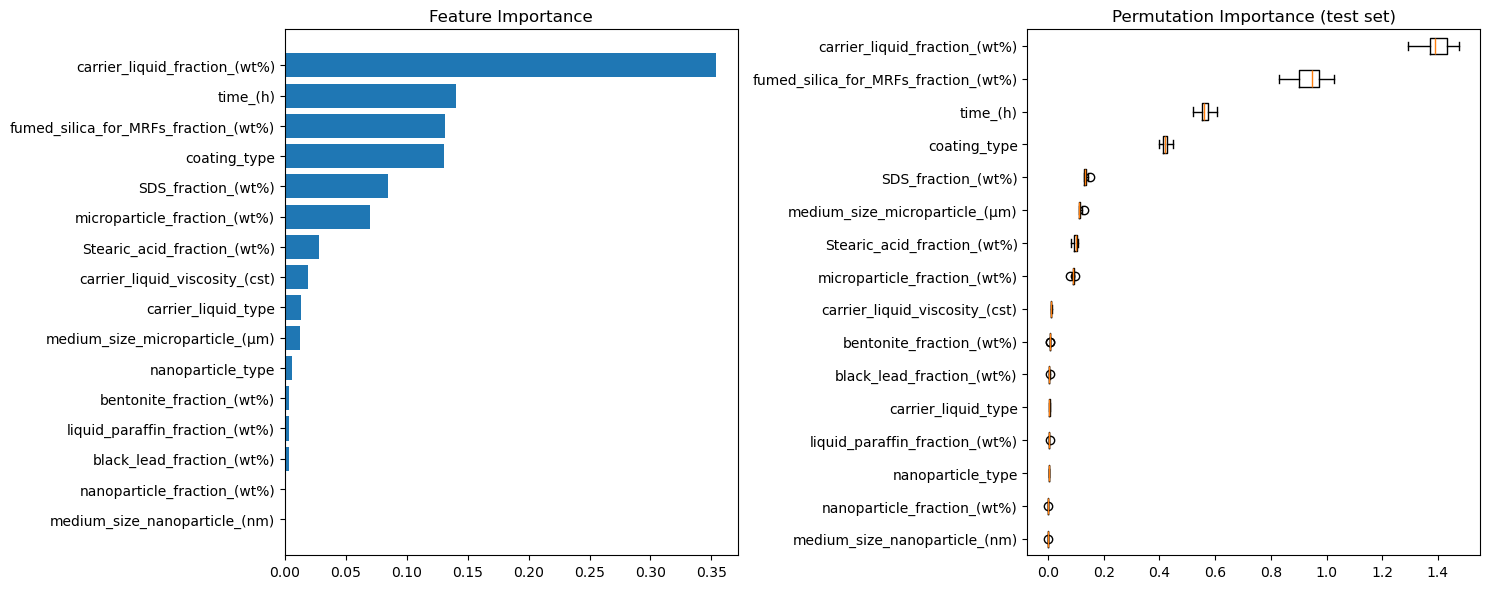

In [152]:
#Feature importance in a Gradient Boosting model
feature_importance = regressor_GB.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    regressor_GB, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [153]:
!pip install shap

In [197]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [199]:
feature_names = ['medium_size_microparticle_(μm)', 'microparticle_fraction_(wt%)', 'coating_type', 'carrier_liquid_type', 'carrier_liquid_fraction_(wt%)', 'carrier_liquid_viscosity_(cst)', 'nanoparticle_type', 'medium_size_nanoparticle_(nm)', 'nanoparticle_fraction_(wt%)', 'SDS_fraction_(wt%)', 'Stearic_acid_fraction_(wt%)', 'fumed_silica_for_MRFs_fraction_(wt%)', 'bentonite_fraction_(wt%)', 'liquid_paraffin_fraction_(wt%)', 'black_lead_fraction_(wt%)', 'time_(h)']

In [201]:
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [203]:
explainer = shap.Explainer(regressor_GB, X_train)
shap_values = explainer(X_test)

100%|===================| 977/980 [01:49<00:00]        

In [204]:
shap_values_array = shap_values.values

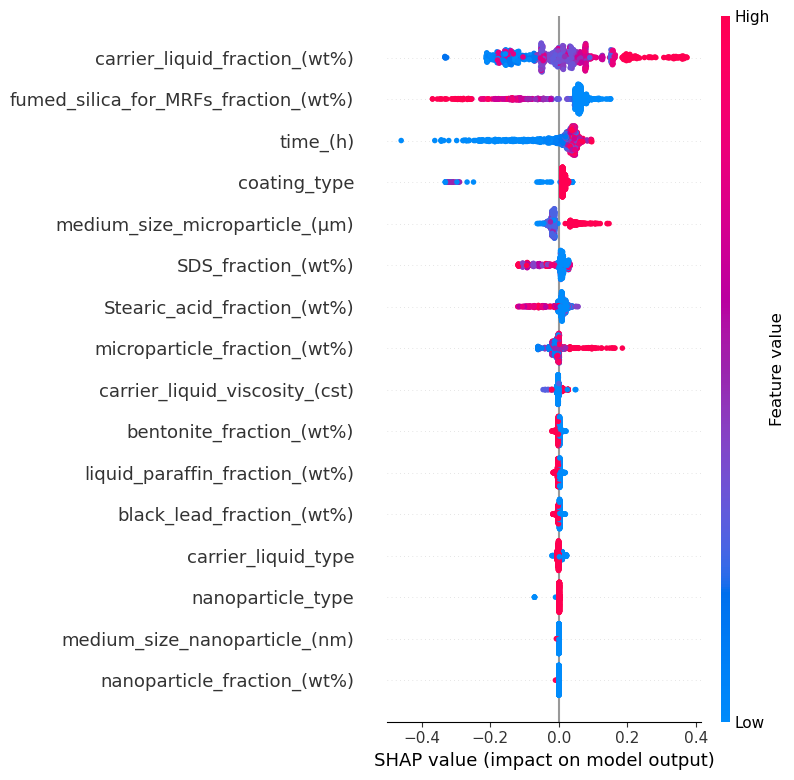

In [205]:
shap.summary_plot(shap_values_array, X_test)

                                 Feature  Importance
4          carrier_liquid_fraction_(wt%)        0.10
11  fumed_silica_for_MRFs_fraction_(wt%)        0.08
15                              time_(h)        0.06
2                           coating_type        0.03
0         medium_size_microparticle_(μm)        0.03
9                     SDS_fraction_(wt%)        0.02
10           Stearic_acid_fraction_(wt%)        0.02
1           microparticle_fraction_(wt%)        0.01
5         carrier_liquid_viscosity_(cst)        0.00
12              bentonite_fraction_(wt%)        0.00
13        liquid_paraffin_fraction_(wt%)        0.00
14             black_lead_fraction_(wt%)        0.00
3                    carrier_liquid_type        0.00
6                      nanoparticle_type        0.00
7          medium_size_nanoparticle_(nm)        0.00
8            nanoparticle_fraction_(wt%)        0.00


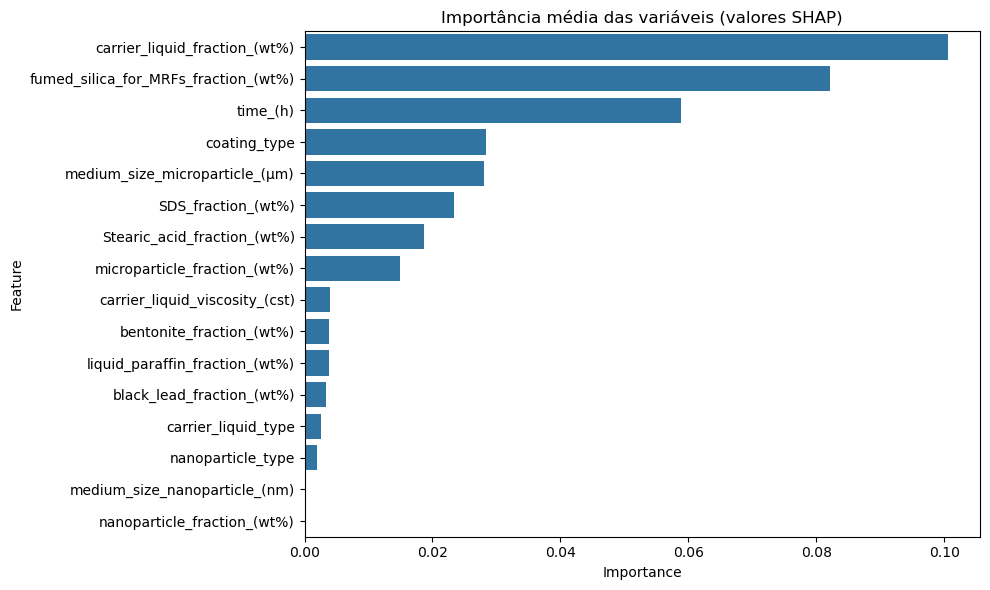

In [187]:
#Absolute average importance of each variable
importance = np.abs(shap_values_array).mean(axis=0)

#Creating an ordered DataFrame with names
shap_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

#Show results
print(shap_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=shap_importance_df)
plt.title("Average importance of variables (SHAP values)")
plt.tight_layout()
plt.show()


In [189]:
#Calculates average absolute importance of each variable
shap_values_array = shap_values.values
mean_abs_shap = np.abs(shap_values_array).mean(axis=0)

#Creates DataFrame with feature names and their importance
shap_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'SHAP Importance (mean |value|)': mean_abs_shap
})

#Order from most important to least important
shap_importance_df.sort_values(by='SHAP Importance (mean |value|)', ascending=False, inplace=True)

#Calculates percentage of total amount
total_importance = shap_importance_df['SHAP Importance (mean |value|)'].sum()
shap_importance_df['Percentage'] = (shap_importance_df['SHAP Importance (mean |value|)'] / total_importance) * 100

#Classifies into levels of influence
def classify_by_percent(val):
    if val >= 15:
        return "High"
    elif val >= 5:
        return "Medium"
    else:
        return "Low"

shap_importance_df['Influence level (%)'] = shap_importance_df['Percentage'].apply(classify_by_percent)

#Show results
shap_importance_df


Feature  SHAP Importance (mean |value|)  \
4          carrier_liquid_fraction_(wt%)                            0.10   
11  fumed_silica_for_MRFs_fraction_(wt%)                            0.08   
15                              time_(h)                            0.06   
2                           coating_type                            0.03   
0         medium_size_microparticle_(μm)                            0.03   
9                     SDS_fraction_(wt%)                            0.02   
10           Stearic_acid_fraction_(wt%)                            0.02   
1           microparticle_fraction_(wt%)                            0.01   
5         carrier_liquid_viscosity_(cst)                            0.00   
12              bentonite_fraction_(wt%)                            0.00   
13        liquid_paraffin_fraction_(wt%)                            0.00   
14             black_lead_fraction_(wt%)                            0.00   
3                    carrier_liquid_type                            0.00   
6                      nanoparticle_type                            0.00   
7          medium_size_nanoparticle_(nm)                            0.00   
8            nanoparticle_fraction_(wt%)                            0.00   

    Percentage Influence level (%)  
4        26.83                High  
11       21.92                High  
15       15.71                High  
2         7.56              Medium  
0         7.48              Medium  
9         6.24              Medium  
10        4.97                 Low  
1         3.99                 Low  
5         1.07                 Low  
12        1.01                 Low  
13        1.00                 Low  
14        0.91                 Low  
3         0.71                 Low  
6         0.51                 Low  
7         0.05                 Low  
8         0.05                 Low